In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [30]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

## Reading Dataset

In [31]:
corona =  pd.read_csv("COVID-19 Coronavirus.csv")

In [32]:
corona

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [33]:
corona.shape

(225, 10)

This data set contains **255 rows** and the **10 columns**

## Analying Null values

In [34]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


<AxesSubplot:>

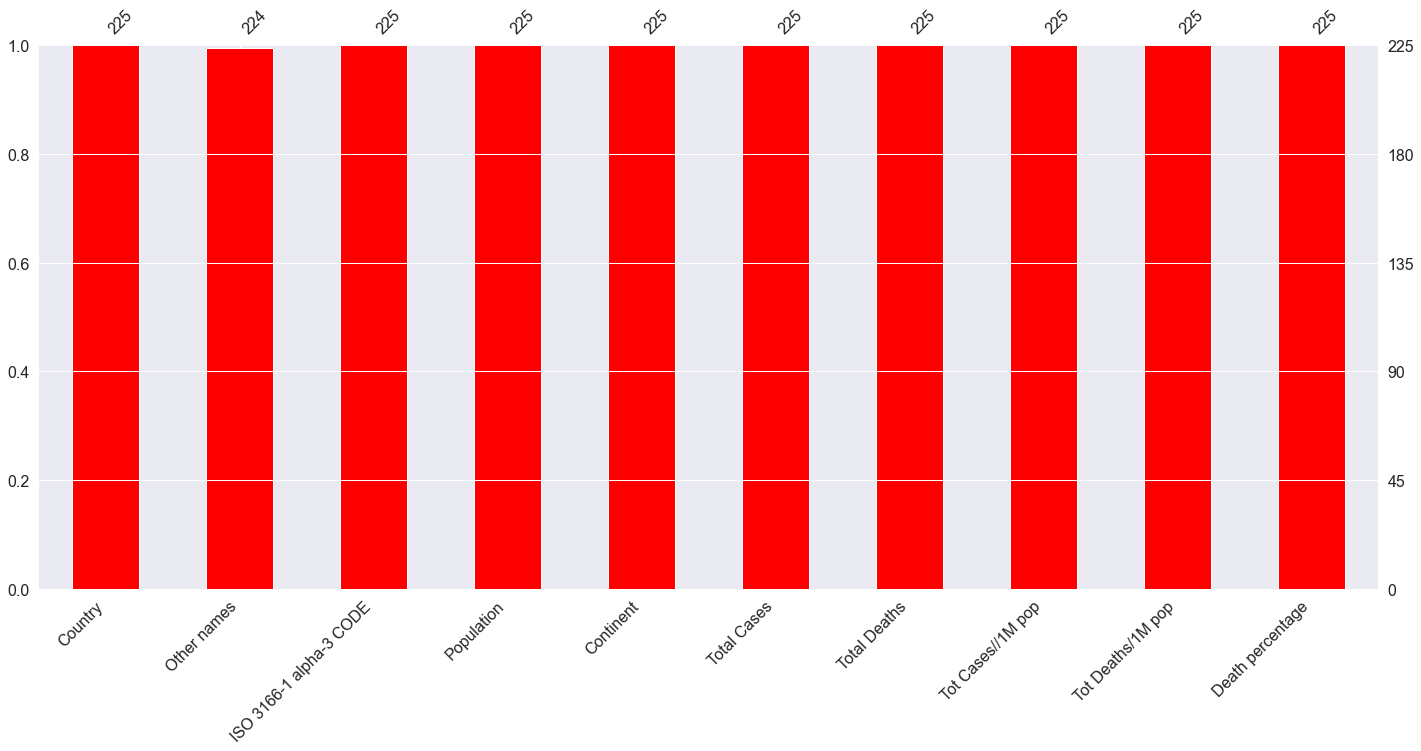

In [35]:
msno.bar(corona, color ='Red')

Here we can analys that **Other name** column have one null value in it.

Other name is the other name of the country. As we had analysed Other name is given as same the country name. Therefore, We will replace the **Nan**  value present in other name column with the name of the country of that particuler column.

For that we need to find out the which country's other name is missing/Null.

In [36]:
c1 = corona.isnull().any(axis=1)
c1 = corona[c1]
c1

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
135,Montenegro,NaN,MNE,628205,Europe,233326,2705,371417,4306,1.159322


So, the above given column have the Nan value. Here we can see its **Country** name is **Montenegro**.

Therefore, we will replace the value of Nan with **Montenegro**.

In [37]:
corona['Other names'].fillna('Montenegro', inplace=True)

In [38]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              225 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


<AxesSubplot:>

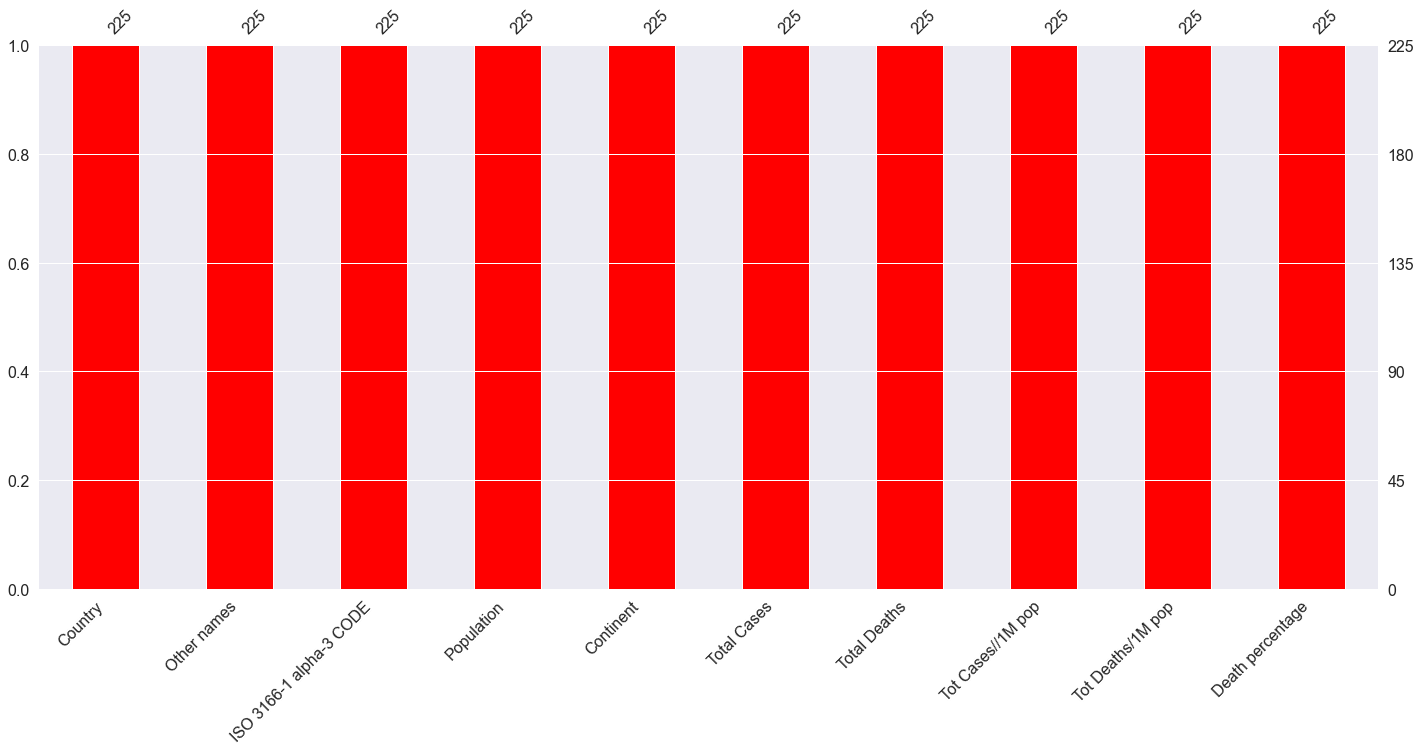

In [39]:
msno.bar(corona, color ='Red')

Here we can say that there are no **Missing/Null** values are presented in our dataset. 


## Statastical Analysis.

In [40]:
corona.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


Here we can see the **Mathemetical Analysis** for the numerical columns.

In [57]:
corona.describe(include = 'object')

,Country,Other names,ISO 3166-1 alpha-3 CODE,Continent
count,225,225,225,225
unique,225,225,225,6
top,Afghanistan,Afghanistan,AFG,Africa
freq,1,1,1,58


In [60]:
corona.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')

## Univariate Analysis

In [64]:
numeric = ['Population', 'Total Cases', 'Total Deaths','Death percentage']

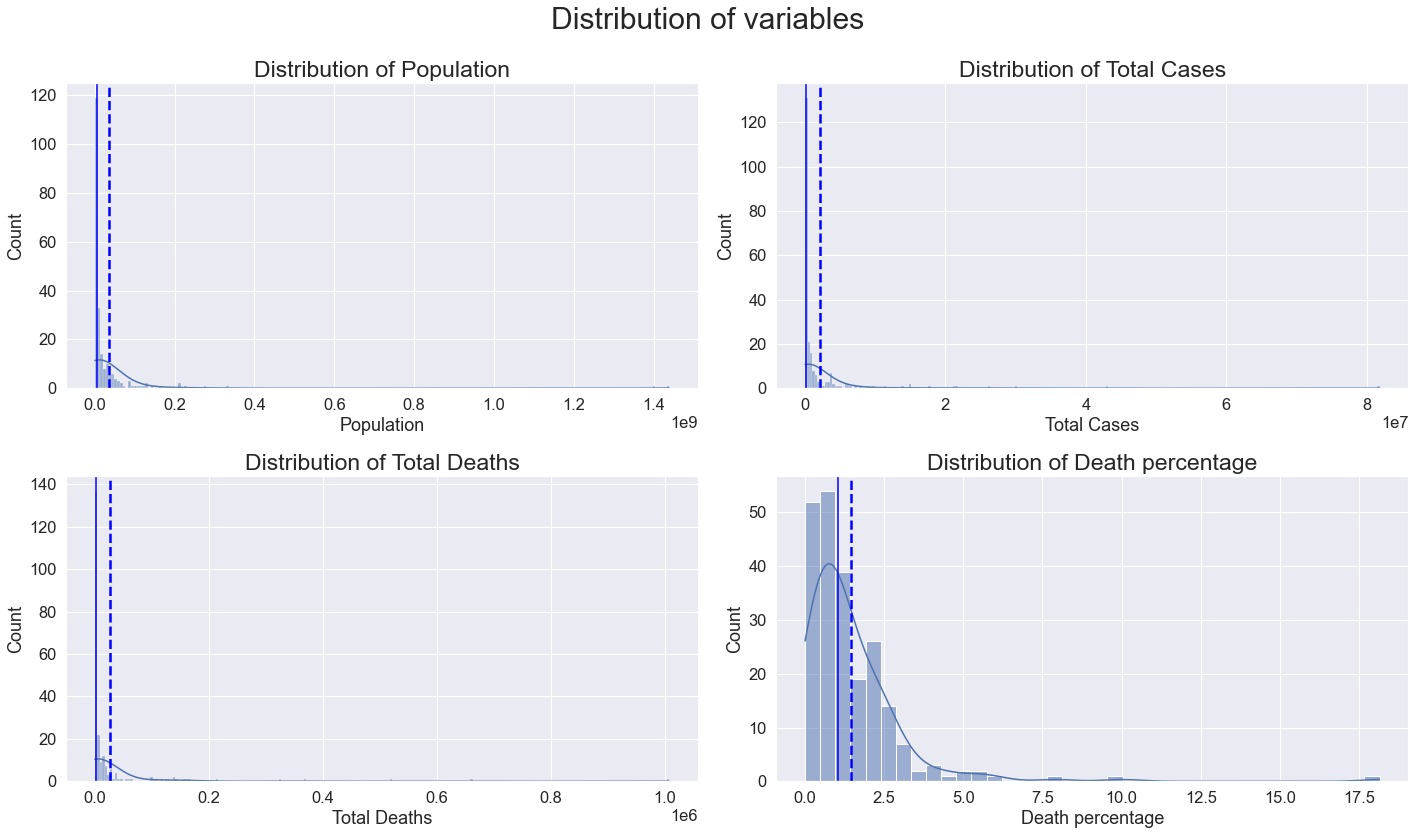

In [108]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(corona[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=corona[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=corona[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


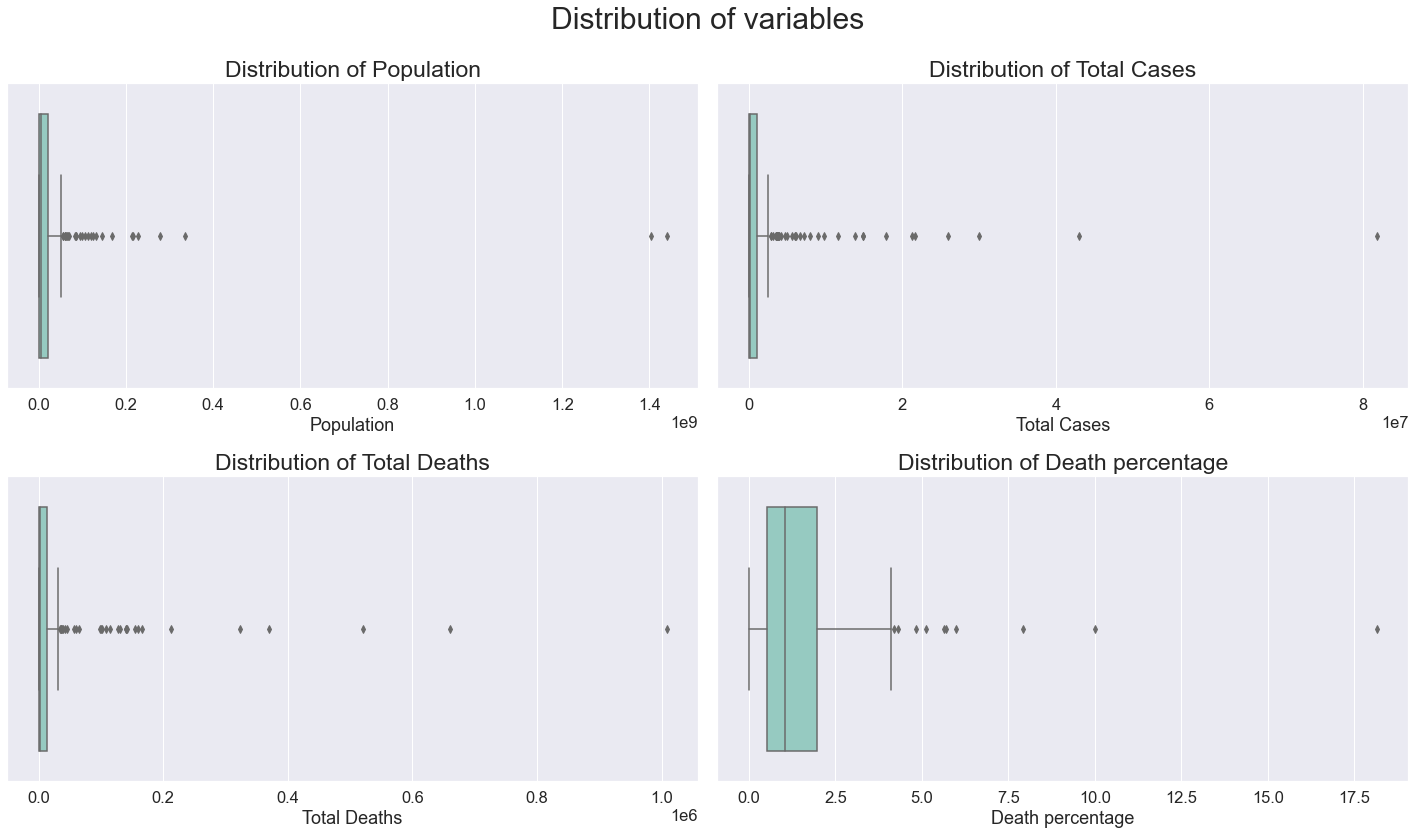

In [111]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(x=corona[i],palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


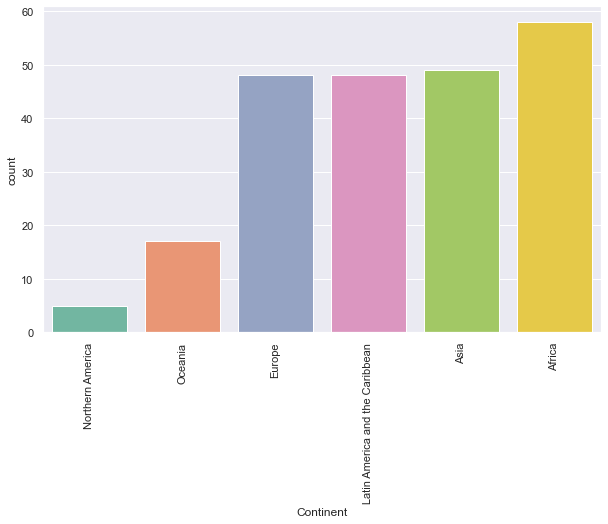

In [58]:
sns.countplot(x='Continent', data=corona, palette='Set2',order=corona['Continent'].value_counts().sort_values().index)
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

In [42]:
corona.Continent.nunique()

6

In [43]:
cases = corona.sort_values(by=['Total Cases'])
high_cases = cases.tail(10)

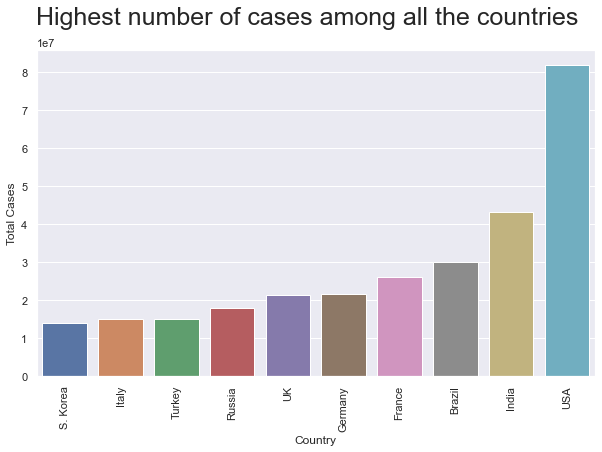

In [44]:
sns.barplot(y='Total Cases', x='Country', data=high_cases)
plt.xticks(rotation=90)
plt.suptitle("Highest number of cases among all the countries", fontsize=25)
plt.show()

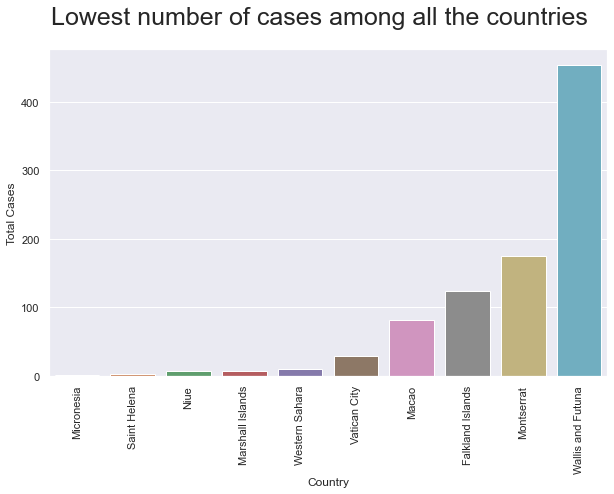

In [45]:
low_cases = cases.head(10)
sns.barplot(y='Total Cases', x='Country', data=low_cases)
plt.xticks(rotation=90)
plt.suptitle("Lowest number of cases among all the countries", fontsize=25)
plt.show()

In [46]:
deaths = corona.sort_values(by=['Total Deaths'])
high_deaths = deaths.tail(10)

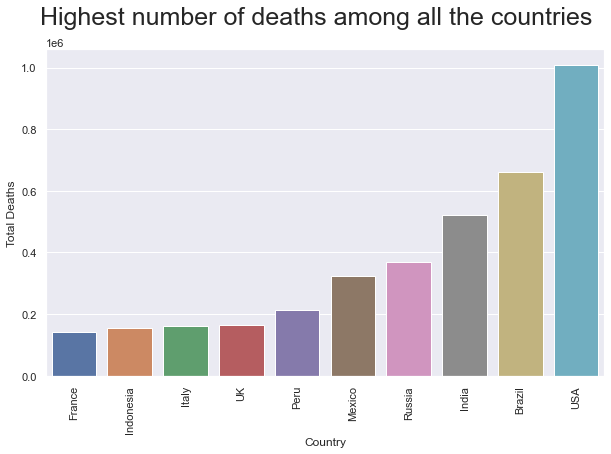

In [47]:
sns.barplot(y='Total Deaths', x='Country', data=high_deaths)
plt.xticks(rotation=90)
plt.suptitle("Highest number of deaths among all the countries", fontsize=25)
plt.show()

In [48]:
low_deaths = deaths.loc[deaths['Total Deaths'] > 0]

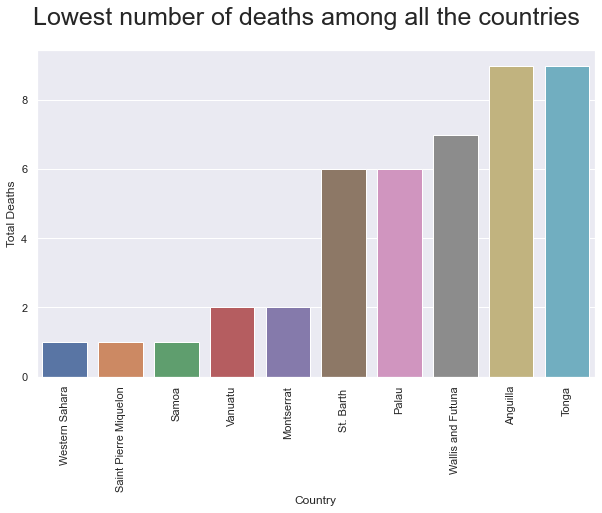

In [49]:
low_deaths = low_deaths.head(10)
sns.barplot(y='Total Deaths', x='Country', data=low_deaths)
plt.xticks(rotation=90)
plt.suptitle("Lowest number of deaths among all the countries", fontsize=25)
plt.show()

In [50]:
zero_deaths = deaths.loc[deaths['Total Deaths'] == 0]

In [51]:
zero_deaths

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
168,Saint Helena,Saint Helena,SHN,6109,Africa,2,0,327,0,0.0
118,Macao,"China, Macao Special Administrative Region",MAC,664828,Asia,82,0,123,0,0.0
217,Vatican City,Holy See,VAT,805,Europe,29,0,36025,0,0.0
131,Micronesia,Micronesia (Federated States of),FSM,117134,Oceania,1,0,9,0,0.0
67,Falkland Islands,Falkland Islands (Malvinas),FLK,3657,Latin America and the Caribbean,123,0,33634,0,0.0
46,Cook Islands,Cook Islands,COK,17592,Oceania,2118,0,120396,0,0.0
125,Marshall Islands,Marshall Islands,MHL,59889,Oceania,7,0,117,0,0.0
148,Niue,Niue,NIU,1645,Oceania,7,0,4255,0,0.0


In [52]:
cont_clms = ['Continent', 'Total Cases','Total Deaths']
continent = corona[cont_clms]
continent = continent.groupby(['Continent']).agg({'Total Cases': 'sum', 'Total Deaths': 'sum'})
continent

,Total Cases,Total Deaths
Continent,,
Africa,11764207,252873
Asia,140957179,1405003
Europe,180332483,1775727
Latin America and the Caribbean,67509231,1686828
Northern America,85364770,1046062
Oceania,5647957,9336


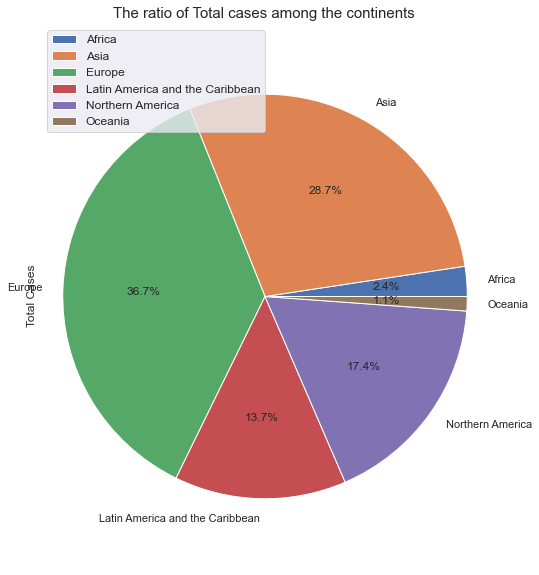

In [53]:
plot = continent.plot.pie(y='Total Cases', figsize=(8, 10),autopct='%1.1f%%')
plt.legend(loc='upper left',fontsize=12)
plt.title('The ratio of Total cases among the continents', size='15')
plt.axis('equal')
plt.show()

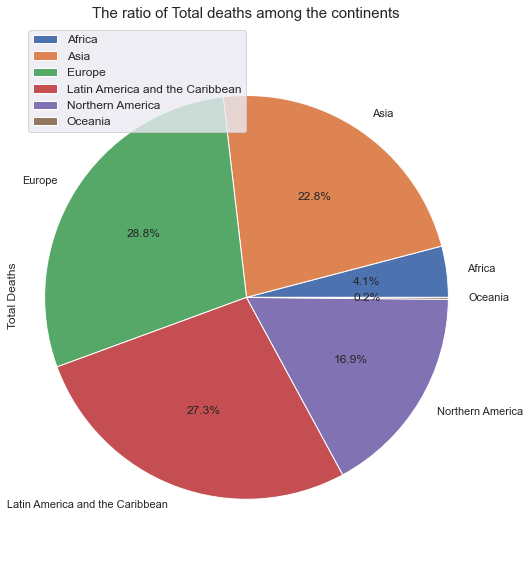

In [54]:
plot = continent.plot.pie(y='Total Deaths', figsize=(8, 10),autopct='%1.1f%%')
plt.legend(loc='upper left',fontsize=12)
plt.title('The ratio of Total deaths among the continents', size='15')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Total Deaths', ylabel='Total Cases'>

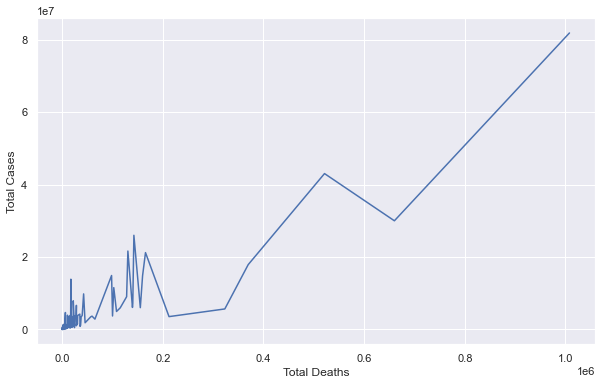

In [55]:
sns.lineplot(x='Total Deaths',y='Total Cases', data=corona)

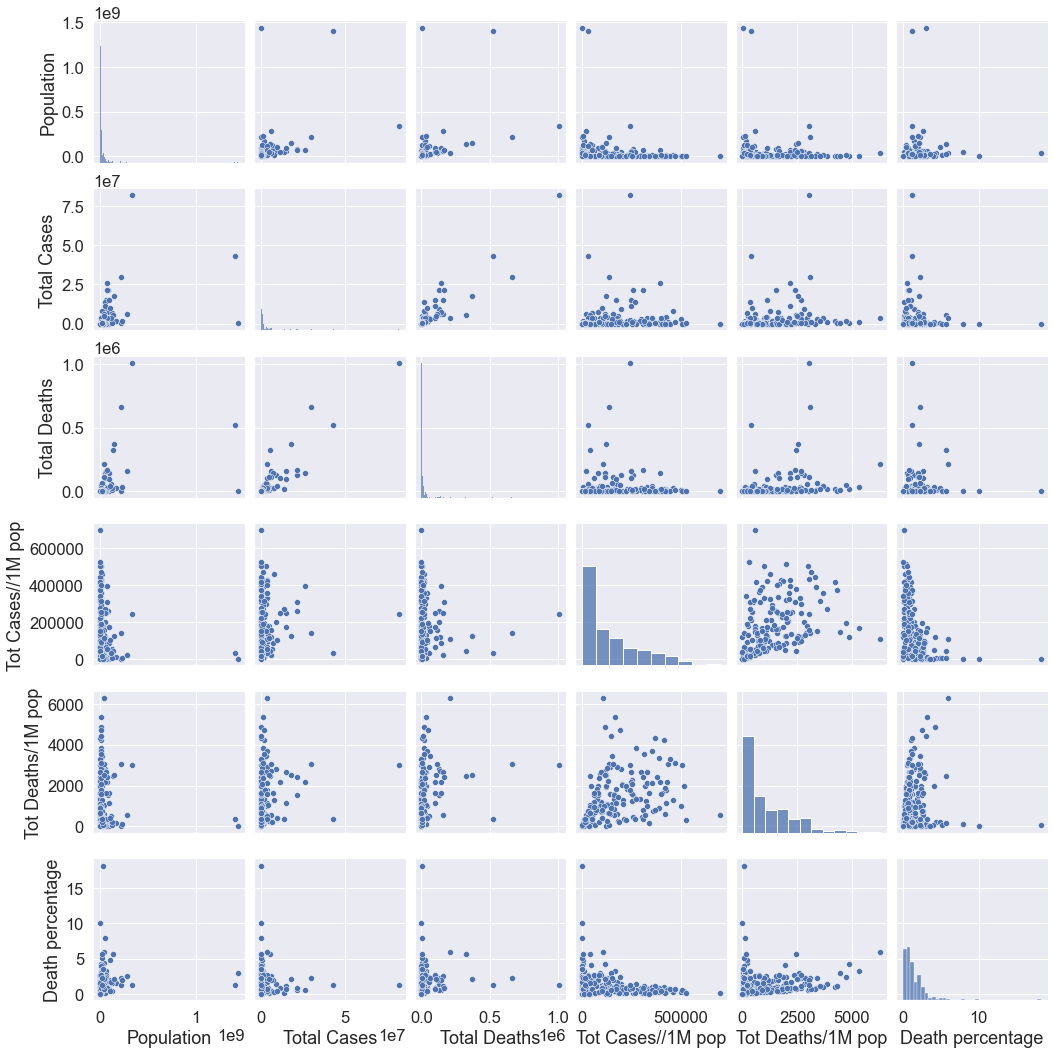

In [116]:
sns.pairplot(corona)

<AxesSubplot:>

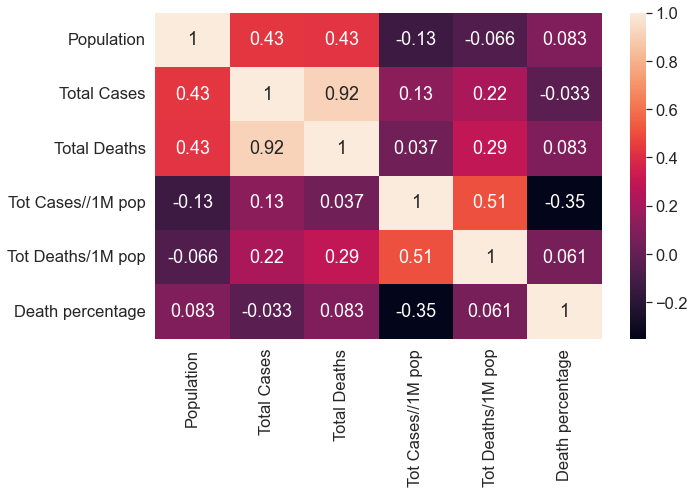

In [115]:
sns.heatmap(corona.corr(), annot=True)